Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Reading the dataset

In [8]:
df=pd.read_csv("/content/netflix1.csv")
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [10]:
df.shape

(8790, 10)

In [12]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [13]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [15]:
df.duplicated().sum()

0

In [16]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


Data-Cleaning

In [18]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)

In [19]:
df['date_added'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8790 entries, 0 to 8789
Series name: date_added
Non-Null Count  Dtype         
--------------  -----         
4404 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 68.8 KB


In [20]:
df.describe()

,date_added,release_year
count,4404,8790.000000
mean,2019-06-11 19:51:10.299727616,2014.183163
min,2009-11-18 00:00:00,1925.000000
25%,2018-06-18 00:00:00,2013.000000
50%,2019-08-16 00:00:00,2017.000000
75%,2020-08-30 06:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


In [21]:
type_counts = df['type'].value_counts()
type_counts

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

Data Visualization

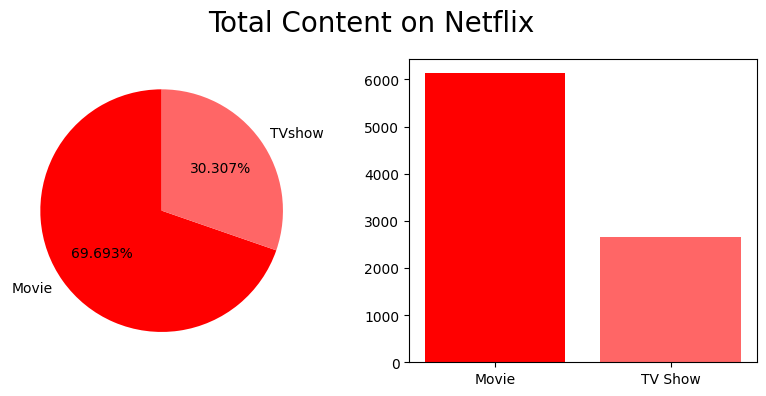

In [25]:
colors = ['#FF0000', '#FF6666']
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Pie chart
axs[0].pie(type_counts, labels=['Movie', 'TVshow'], autopct='%1.3f%%', startangle=90, colors=colors)

# Bar chart
axs[1].bar(type_counts.index, type_counts.values, color=colors)
plt.suptitle('Total Content on Netflix', fontsize=20)
plt.tight_layout()
plt.show()

In [26]:
top_countries = df['country'].value_counts().reset_index().sort_values(by='count', ascending=False).head(10)
top_countries

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


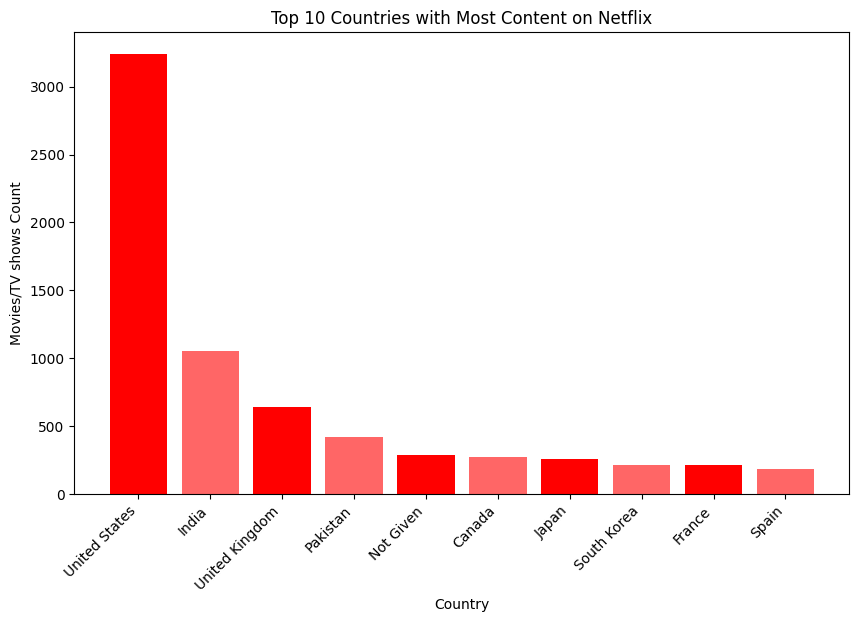

In [27]:
colors_bar = ['#FF0000', '#FF6666']
plt.figure(figsize=(10, 6))
plt.bar(top_countries['country'], top_countries['count'], color=colors_bar)
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Movies/TV shows Count' )
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

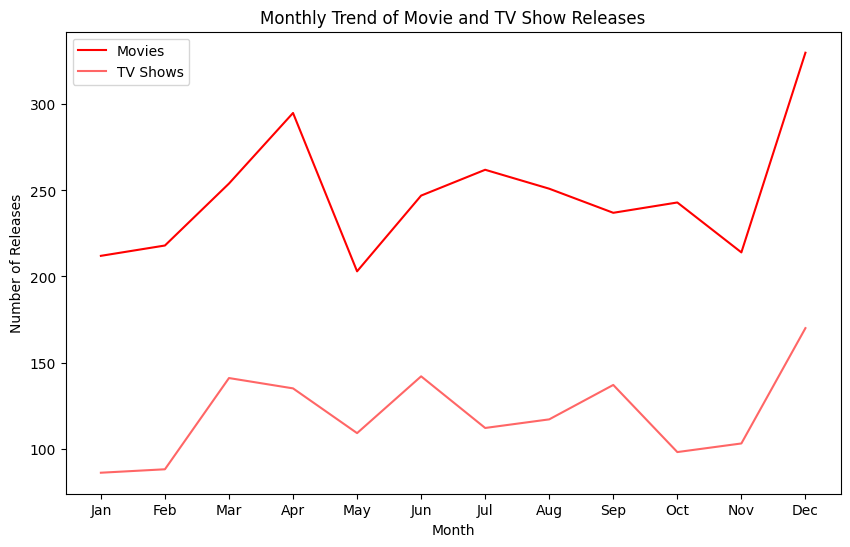

In [30]:
df['month_added'] = df['date_added'].dt.month

movie_monthly_counts = df[df['type'] == 'Movie']['month_added'].value_counts().sort_index()
tv_show_monthly_counts = df[df['type'] == 'TV Show']['month_added'].value_counts().sort_index()
color_movie = '#FF0000' # gray
color_tv_show = '#FF6666' # dark red
plt.figure(figsize=(10, 6))
plt.plot(movie_monthly_counts.index, movie_monthly_counts.values,color=color_movie, label='Movies')
plt.plot(tv_show_monthly_counts.index, tv_show_monthly_counts.values,color=color_tv_show,label='TV Shows')
plt.title('Monthly Trend of Movie and TV Show Releases')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.show()

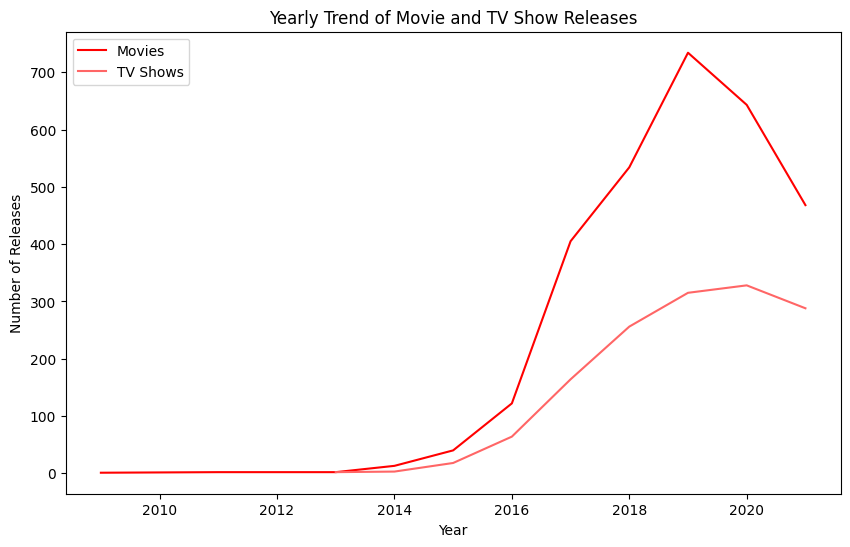

In [32]:
df['year_added'] = pd.to_datetime(df['date_added']).dt.year
movie_yearly_counts = df[df['type'] == 'Movie']['year_added'].value_counts().sort_index()
tv_show_yearly_counts = df[df['type'] == 'TV Show']['year_added'].value_counts().sort_index()
color_movie = '#FF0000' # gray
color_tv_show = '#FF6666' # dark red
plt.figure(figsize=(10, 6))
plt.plot(movie_yearly_counts.index, movie_yearly_counts.values, label='Movies',color=color_movie)
plt.plot(tv_show_yearly_counts.index, tv_show_yearly_counts.values, label='TV Shows',color=color_tv_show)
plt.title('Yearly Trend of Movie and TV Show Releases')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.show()

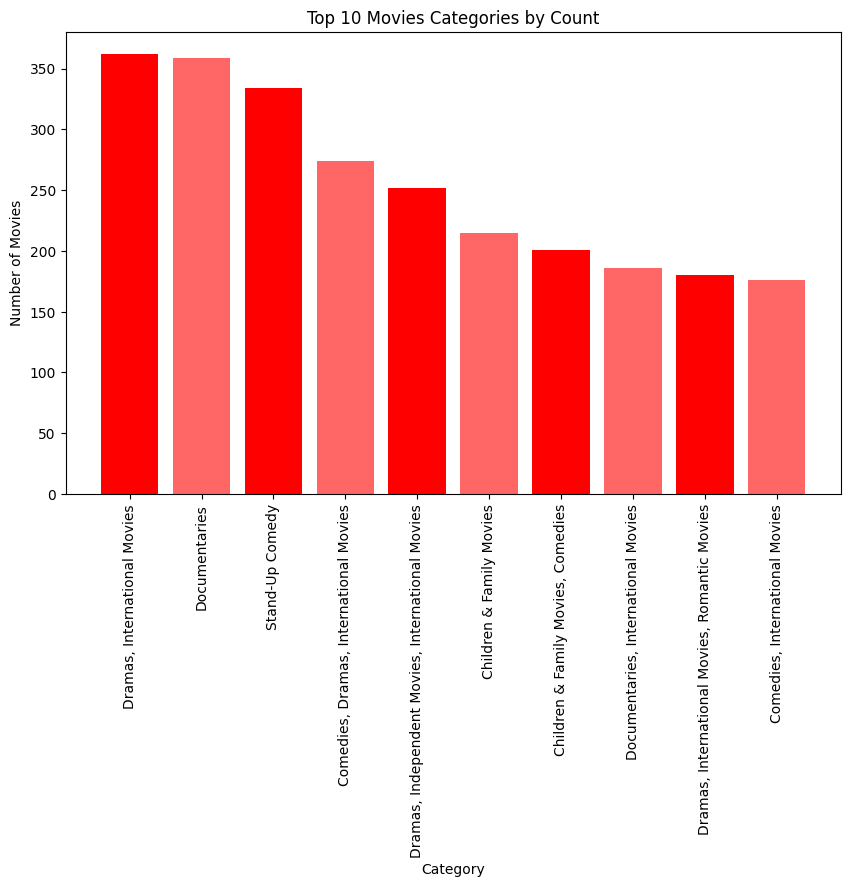

In [36]:
colors = ['#FF0000', '#FF6666']
top_10_movies_by_category = df[df['type'] == 'Movie'].groupby('listed_in').size().nlargest(10)
top_10_movies_by_category = top_10_movies_by_category.reset_index(name='count')
plt.figure(figsize=(10, 6))
plt.bar(top_10_movies_by_category['listed_in'], top_10_movies_by_category['count'], color=colors )
plt.title('Top 10 Movies Categories by Count')
plt.xlabel('Category')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90, ha='center')
plt.show()

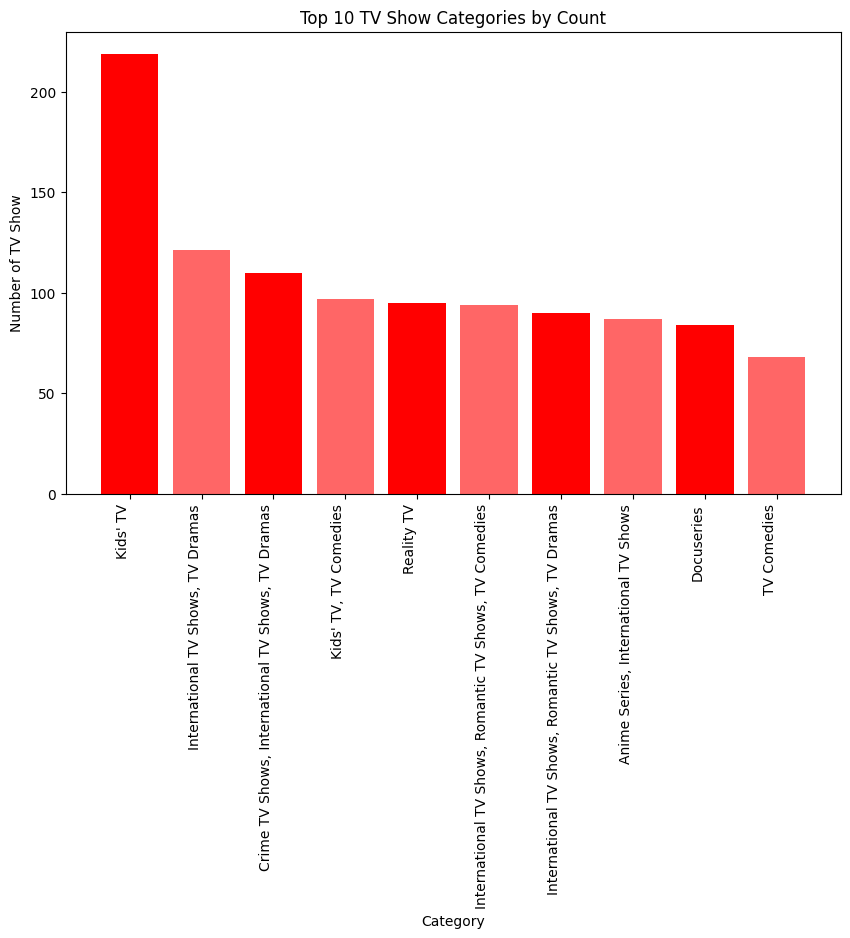

In [37]:
colors = ['#FF0000', '#FF6666']
top_10_TVShow_by_category = df[df['type'] == 'TV Show'].groupby('listed_in').size().nlargest(10)
top_10_TVShow_by_category = top_10_TVShow_by_category.reset_index(name='count')
plt.figure(figsize=(10, 6))
plt.bar(top_10_TVShow_by_category['listed_in'], top_10_TVShow_by_category['count'], color=colors )
plt.title('Top 10 TV Show Categories by Count')
plt.xlabel('Category')
plt.ylabel('Number of TV Show')
plt.xticks(rotation=90, ha='right')
plt.show()

In [38]:
Top_10_Directors= df['director'].value_counts()
Top_10_Directors.head(10)

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: count, dtype: int64

In [39]:
num_of_director_movies = df.groupby(['director', 'type'])[ 'director'].value_counts().reset_index().head(10)
num_of_director_movies

,director,type,count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
5,Aamir Bashir,Movie,1
6,Aamir Khan,Movie,1
7,Aanand Rai,Movie,1
8,Aaron Burns,Movie,1
9,"Aaron Hancox, Michael McNamara",Movie,1


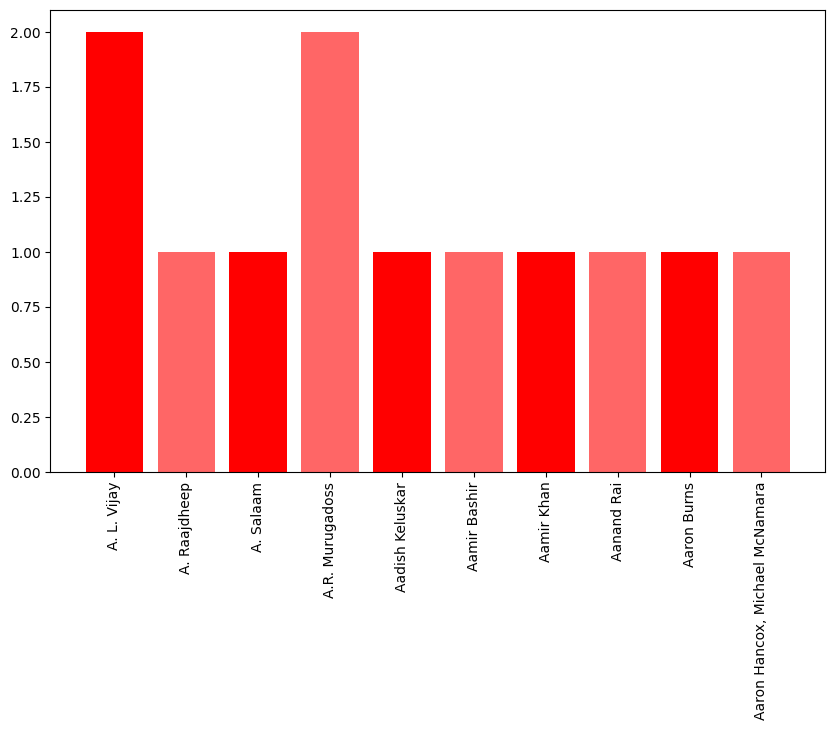

In [41]:
colors = ['#FF0000', '#FF6666']
plt.figure(figsize=(10, 6))
plt.bar(num_of_director_movies['director'],num_of_director_movies['count'], color=colors)
plt.xticks(rotation=90)
plt.show()

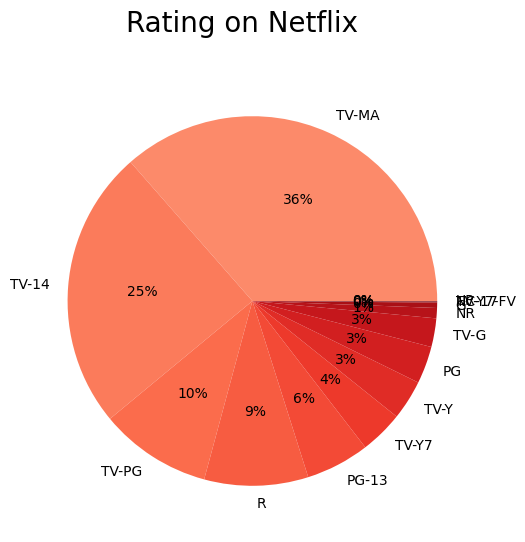

In [45]:
colormap = plt.cm.Reds
colors = colormap(np.linspace(0.4, 1, len(ratings['count'])))  # Adjust 0.4 to change the lightness
ratings=df['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)
# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(ratings['count'], labels=ratings['rating'], colors=colors, autopct='%.0f%%')
plt.suptitle('Rating on Netflix', fontsize=20)
plt.show()